In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2 as cv
import torch
import numpy as np

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [3]:
torch.cuda.set_device(0)

## training

In [4]:
model = YOLO("yolo11n-seg.pt")

In [5]:
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

train_res = model.train(
    data="data/roboflow/data.yaml",
    epochs=50,
    batch=-1,  
    imgsz=640,
    device="gpu",
)

New https://pypi.org/project/ultralytics/8.3.65 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=data/roboflow/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

E0000 00:00:1737596936.030102  166967 cuda_dnn.cc:8593] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737596936.034540  166967 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/train/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:g (NVIDIA GeForce RTX 3050 Laptop GPU) 3.71G total, 0.11G reserved, 0.07G allocated, 3.52G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     2842803       10.36         0.457         23.64           nan        (1, 3, 640, 640)                    list
     2842803       20.71         0.937            26           nan        (2, 3, 640, 640)                    list
     2842803       41.42         1.724         24.07           nan        (4, 3, 640, 640)                    list
     2842803       82.85         3.259         43.01           nan        (8, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 3.71 GiB of which 50.62 MiB is free. Including non-PyTorch memory, this process has 3.29 GiB memory in use. Of the allocated memory 3.05 GiB is allocated by PyTorch, and 114.68 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variable

train: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/train/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]
val: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


Plotting labels to runs/segment/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005078125), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train15
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.05G     0.7734      2.163      2.149      1.318         14        640: 100%|██████████| 72/72 [00:07<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]

                   all         31         31      0.827      0.618      0.856      0.601      0.827      0.618      0.856      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.02G     0.8131      1.216      1.354      1.282         14        640: 100%|██████████| 72/72 [00:07<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.58it/s]

                   all         31         31      0.633      0.946      0.892      0.645      0.612      0.917       0.86      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.03G     0.8052      1.158      1.221      1.268         10        640: 100%|██████████| 72/72 [00:07<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.52it/s]

                   all         31         31      0.935      0.935      0.983      0.801      0.861      0.871       0.89      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.02G     0.7746      1.116      1.092      1.249         13        640: 100%|██████████| 72/72 [00:07<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.52it/s]

                   all         31         31      0.699      0.598       0.74      0.598      0.699      0.598      0.731      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.02G     0.7858      1.103      1.051      1.255         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]

                   all         31         31      0.892      0.802      0.928      0.725      0.892      0.802      0.928       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.02G     0.7458      1.095      0.959      1.214         16        640: 100%|██████████| 72/72 [00:07<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.68it/s]

                   all         31         31      0.761      0.516      0.693      0.543      0.761      0.516      0.693       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.02G     0.7318      1.062     0.8958      1.215          9        640: 100%|██████████| 72/72 [00:07<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.20it/s]

                   all         31         31      0.701      0.908      0.888      0.574      0.701      0.908      0.888      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.02G      0.718     0.9641     0.8441        1.2         17        640: 100%|██████████| 72/72 [00:07<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.57it/s]

                   all         31         31      0.951      0.742      0.818      0.585      0.951      0.742      0.818      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.02G     0.6723     0.9623     0.7764      1.183         17        640: 100%|██████████| 72/72 [00:07<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.64it/s]

                   all         31         31      0.848      0.677      0.865      0.715      0.848      0.677      0.865      0.715



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.02G     0.6943      1.015     0.7236      1.196         18        640: 100%|██████████| 72/72 [00:07<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.01it/s]

                   all         31         31      0.951      0.871      0.956      0.798      0.966      0.918      0.982      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.02G     0.6595     0.9576     0.7091      1.154         17        640: 100%|██████████| 72/72 [00:07<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.53it/s]

                   all         31         31      0.969      0.996      0.994      0.863      0.969      0.996      0.994      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.998G     0.6223     0.8928     0.6419      1.134         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.75it/s]

                   all         31         31      0.898      0.968      0.982      0.844      0.898      0.968      0.964      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.01G     0.6214     0.8858     0.6553      1.136         17        640: 100%|██████████| 72/72 [00:07<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.71it/s]

                   all         31         31          1      0.995      0.995      0.848          1      0.995      0.995      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.992G     0.6036     0.8932     0.6355      1.122          9        640: 100%|██████████| 72/72 [00:07<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.49it/s]

                   all         31         31      0.909      0.963      0.975      0.807      0.909      0.963      0.975      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.994G     0.5904     0.9247        0.6      1.102         19        640: 100%|██████████| 72/72 [00:07<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.97it/s]


                   all         31         31      0.966      0.935      0.977      0.834      0.966      0.935      0.977      0.832

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.994G     0.5863     0.8247     0.5793      1.126         16        640: 100%|██████████| 72/72 [00:07<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.69it/s]

                   all         31         31          1        0.9      0.959      0.839          1        0.9      0.959       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.994G     0.5983     0.8836      0.599      1.128         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.27it/s]

                   all         31         31      0.714      0.903      0.885      0.798      0.714      0.903      0.885      0.788



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.994G     0.5434     0.8761     0.5471      1.097         13        640: 100%|██████████| 72/72 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.46it/s]

                   all         31         31          1      0.957      0.993      0.895          1      0.957      0.993       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.994G     0.5406     0.8305     0.5026      1.085         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.97it/s]

                   all         31         31          1      0.967      0.987      0.856          1      0.967      0.987      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.994G     0.5464     0.7641     0.5062      1.089         15        640: 100%|██████████| 72/72 [00:07<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.35it/s]


                   all         31         31      0.963      0.968      0.989      0.876      0.963      0.968      0.989      0.866

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.994G     0.5118     0.8233     0.5086      1.071         12        640: 100%|██████████| 72/72 [00:07<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.20it/s]

                   all         31         31      0.995      0.871      0.936       0.84      0.995      0.871      0.936      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.992G     0.5334     0.8126     0.4924      1.092         18        640: 100%|██████████| 72/72 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.19it/s]

                   all         31         31      0.969      0.999      0.989      0.907      0.998          1      0.995       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.994G     0.4967     0.7607     0.4514      1.056         17        640: 100%|██████████| 72/72 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.19it/s]

                   all         31         31      0.996      0.968      0.991      0.869      0.996      0.968      0.991      0.894



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.02G     0.5187     0.7612     0.4793      1.065         16        640: 100%|██████████| 72/72 [00:07<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.95it/s]

                   all         31         31      0.934          1      0.984      0.881      0.903      0.968      0.964      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.998G     0.5057     0.7255     0.4531      1.078         20        640: 100%|██████████| 72/72 [00:07<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.87it/s]

                   all         31         31      0.997          1      0.995      0.913      0.997          1      0.995      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.994G     0.5054      0.732     0.4548      1.061         13        640: 100%|██████████| 72/72 [00:07<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.87it/s]

                   all         31         31      0.996          1      0.995      0.894      0.996          1      0.995      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.994G     0.5056     0.7713     0.4469      1.059         14        640: 100%|██████████| 72/72 [00:07<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.88it/s]

                   all         31         31      0.998          1      0.995      0.937      0.998          1      0.995       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.994G     0.4974     0.7648     0.4447      1.054         17        640: 100%|██████████| 72/72 [00:07<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.25it/s]

                   all         31         31      0.997          1      0.995      0.884      0.997          1      0.995       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.994G     0.4744     0.7077     0.4204      1.037         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.93it/s]

                   all         31         31      0.935          1      0.992      0.877      0.935          1      0.992      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.996G     0.4734     0.7081     0.4207      1.044         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.80it/s]

                   all         31         31      0.935      0.968       0.98      0.884      0.966          1      0.993      0.897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.992G      0.467      0.684     0.4107      1.032         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.11it/s]

                   all         31         31      0.998          1      0.995       0.89      0.998          1      0.995      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.994G     0.4441     0.7158     0.3926      1.026         16        640: 100%|██████████| 72/72 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.84it/s]

                   all         31         31      0.996          1      0.995        0.9      0.996          1      0.995      0.894



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.994G     0.4435     0.7187     0.3891      1.018         17        640: 100%|██████████| 72/72 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.46it/s]

                   all         31         31      0.999          1      0.995      0.892      0.999          1      0.995      0.879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.994G     0.4502     0.6708     0.3816      1.019         18        640: 100%|██████████| 72/72 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.44it/s]

                   all         31         31      0.997          1      0.995      0.914      0.997          1      0.995      0.909



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.994G     0.4493     0.7103     0.4125      1.017         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.86it/s]

                   all         31         31          1      0.965      0.993      0.893          1      0.965      0.993      0.885



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.992G     0.4575     0.7093     0.4021      1.018         15        640: 100%|██████████| 72/72 [00:07<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.01it/s]

                   all         31         31      0.996          1      0.995      0.917      0.996          1      0.995      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.02G     0.4294     0.6866     0.3713      1.016         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.84it/s]

                   all         31         31      0.998          1      0.995      0.919      0.998          1      0.995       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50     0.996G     0.4254     0.7007     0.3598       1.01         18        640: 100%|██████████| 72/72 [00:07<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.77it/s]

                   all         31         31      0.997          1      0.995      0.916      0.997          1      0.995      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.994G      0.414     0.6748     0.3493      1.004         16        640: 100%|██████████| 72/72 [00:07<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.59it/s]

                   all         31         31      0.997          1      0.995      0.931      0.997          1      0.995      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.994G     0.3865     0.6704     0.3217       0.99          9        640: 100%|██████████| 72/72 [00:07<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.05it/s]

                   all         31         31      0.997      0.968      0.994      0.918      0.997      0.968      0.994       0.89


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50         1G     0.3792     0.6114     0.5078      1.032          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.30it/s]

                   all         31         31      0.988      0.968      0.985      0.905      0.988      0.968      0.985      0.903



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.01G      0.351       0.54     0.3309     0.9937          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.84it/s]

                   all         31         31      0.966          1      0.994      0.912      0.992      0.968      0.977      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.01G     0.3458     0.5175     0.3335      1.011          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.59it/s]

                   all         31         31      0.998      0.968      0.965      0.918      0.998      0.968      0.965      0.912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.01G      0.333     0.4958     0.3142      1.002          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.22it/s]

                   all         31         31      0.998      0.968      0.967      0.905      0.998      0.968      0.967      0.892



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.01G     0.3205     0.5234     0.2975     0.9839          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.84it/s]

                   all         31         31      0.999          1      0.995      0.934      0.999          1      0.995      0.924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.01G     0.2961     0.4634     0.2818      0.966          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.24it/s]

                   all         31         31          1          1      0.995      0.913          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.01G     0.3021      0.457     0.2764     0.9691          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.78it/s]

                   all         31         31          1      0.998      0.995       0.92          1      0.998      0.995      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.01G     0.2849     0.4616     0.2688     0.9687          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.14it/s]

                   all         31         31          1      0.999      0.995      0.934          1      0.999      0.995      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.01G      0.265     0.4658      0.252     0.9361          5        640: 100%|██████████| 72/72 [00:07<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.74it/s]

                   all         31         31          1      0.998      0.995      0.928          1      0.998      0.995      0.918



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.01G     0.2615     0.4395     0.2463     0.9283          5        640: 100%|██████████| 72/72 [00:07<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.69it/s]

                   all         31         31          1      0.998      0.995      0.925          1      0.998      0.995      0.916



50 epochs completed in 0.113 hours.
Optimizer stripped from runs/segment/train15/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train15/weights/best.pt, 6.0MB

Validating runs/segment/train15/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1 CUDA:gpu (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]


                   all         31         31          1      0.999      0.995      0.934          1      0.999      0.995      0.933
Speed: 1.2ms preprocess, 9.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/segment/train15


# evaluation and inference

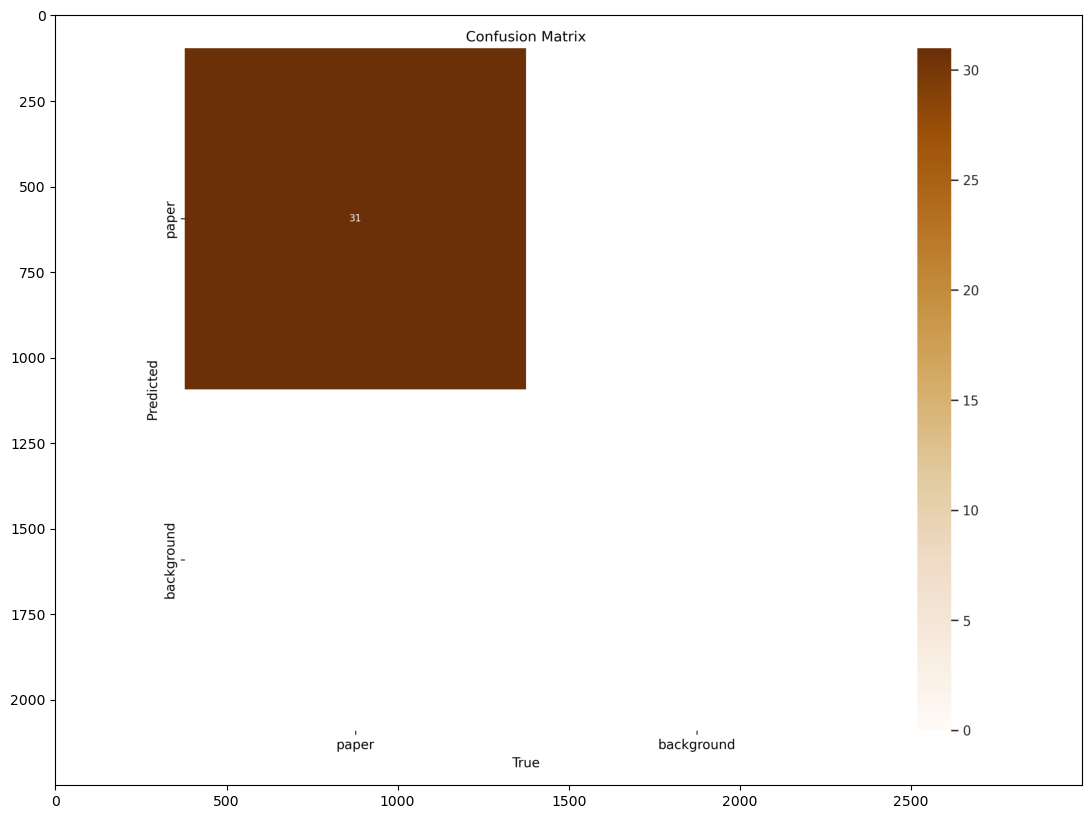

In [21]:
confusion_matrix = cv.imread("runs/segment/train15/confusion_matrix.png")
fig = plt.figure(figsize=(15, 10))
plt.imshow(confusion_matrix)
plt.show()

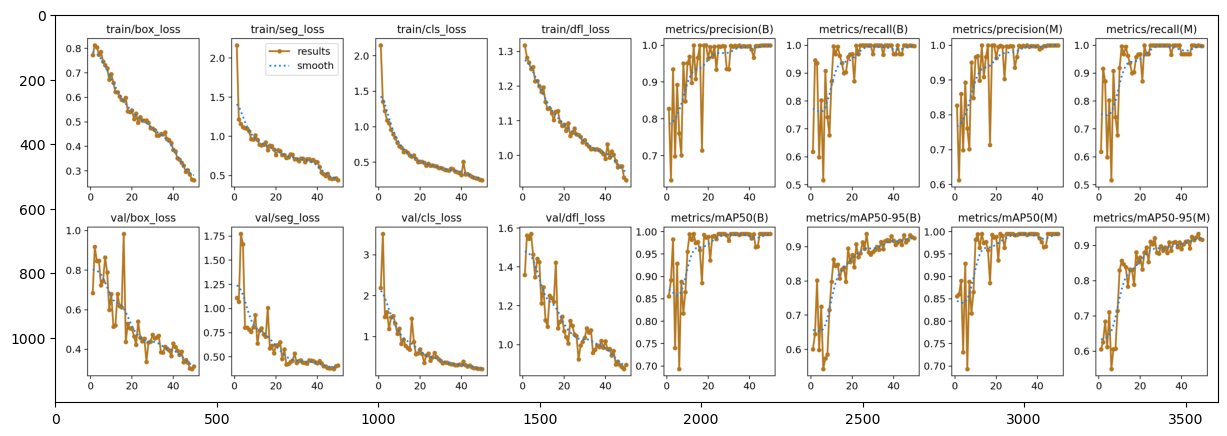

In [22]:
metrics = cv.imread("runs/segment/train15/results.png")
fig = plt.figure(figsize=(15, 10))
plt.imshow(metrics)
plt.show()

In [15]:
import ultralytics.nn.modules.block

In [4]:
model_best=YOLO('runs/segment/train15/weights/best.pt')

In [5]:
val = model_best.val()

Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3795MiB)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


val: Scanning /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


                   all         31         31          1      0.998      0.995      0.936      0.997      0.968      0.994      0.925
Speed: 1.3ms preprocess, 6.8ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/segment/val5


In [8]:
model_best.export(format="tflite")

Ultralytics 8.3.11 🚀 Python-3.11.11 torch-2.0.1+cu117 CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
YOLO11n-seg summary (fused): 265 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs

PyTorch: starting from 'runs/segment/train15/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (5.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 2.5s, saved as 'runs/segment/train15/weights/best.onnx' (11.2 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1737647200.116886   49364 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1737647200.116907   49364 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1737647202.842913   49364 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1737647202.842931   49364 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 22.8s, saved as 'runs/segment/train15/weights/best_saved_model' (28.2 MB)

TensorFlow Lite: starting export with tensorflow 2.16.1...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/segment/train15/weights/best_saved_model/best_float32.tflite' (11.1 MB)

Export complete (23.2s)
Results saved to /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/runs/segment/train15/weights
Predict:         yolo predict task=segment model=runs/segment/train15/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=segment model=runs/segment/train15/weights/best_saved_model/best_float32.tflite imgsz=640 data=data/roboflow/data.yaml  
Visualize:       https://netron.app


'runs/segment/train15/weights/best_saved_model/best_float32.tflite'

# ----------------------------------------------------------------

# inference

In [11]:
results = model_best("data/roboflow/test/images/")
for im in results:
  im.show()


image 1/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0002_jpg.rf.598a25ee946dd19d5248fbea11058477.jpg: 640x480 1 paper, 79.0ms
image 2/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0080_jpeg.rf.59bdd09980d768ed4e99a8294cee13c0.jpg: 384x640 1 paper, 45.5ms
image 3/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0104_jpeg.rf.bbf60fa0c46f432a3b1ae7e7fb473b1e.jpg: 384x640 1 paper, 4.8ms
image 4/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0117_jpeg.rf.24585b7613fd85ac37e462a0c1cc9008.jpg: 384x640 1 paper, 5.0ms
image 5/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segme

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'


[GFX1-]: glxtest: Could not connect to wayland display, WAYLAND_DISPLAY=(null)
[GFX1-]: More than 1 GPU vendor detected via PCI, cannot deduce vendor

[GFX1-]: PCI candidate 0x8086/0x9a68

[GFX1-]: PCI candidate 0x10de/0x25a2



Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
[ERROR glean_core::metrics::ping] Invalid reason code active for ping usage-reporting
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'
Error: Failed to open Wayland display, fa

In [12]:
model_quant=YOLO('runs/segment/train/weights/best.pt')
model_quant.to('cuda')

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_runnin

In [13]:
res=model_quant.predict("data/roboflow/test/images/", imgsz=640,device='gpu')


image 1/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0002_jpg.rf.598a25ee946dd19d5248fbea11058477.jpg: 640x480 1 paper, 6.0ms
image 2/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0080_jpeg.rf.59bdd09980d768ed4e99a8294cee13c0.jpg: 384x640 1 paper, 5.3ms
image 3/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0104_jpeg.rf.bbf60fa0c46f432a3b1ae7e7fb473b1e.jpg: 384x640 1 paper, 5.0ms
image 4/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20241128-WA0117_jpeg.rf.24585b7613fd85ac37e462a0c1cc9008.jpg: 384x640 1 paper, 5.0ms
image 5/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segment

Error: Failed to open Wayland display, fallback to X11. WAYLAND_DISPLAY='wayland-1' DISPLAY=':1'


image 10/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20250112-WA0009_jpeg.rf.025b02911bd5bb55026bcddab243dabc.jpg: 640x384 1 paper, 5.0ms
image 11/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20250115-WA0020_jpg.rf.047222aa5bb44a9e0ba0bc3d7b701c68.jpg: 640x384 1 paper, 5.1ms
image 12/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20250115-WA0025_jpeg.rf.207fb80d257b9b96e80120c2160e2fbe.jpg: 640x384 1 paper, 4.9ms
image 13/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segmentation-for-document-cropping/document_segmentation/yolo/data/roboflow/test/images/IMG-20250115-WA0038_jpg.rf.71826896cd2611f94893602f30ddc6fc.jpg: 640x480 1 paper, 6.0ms
image 14/14 /run/media/mo3hilamo3/9raya??/dev stuff/Image-segm

# ----------------------------------------------------------------

# mask with cropped document

In [15]:
#%matplotlib inline
index=1
plt.figure(figsize=(20,110))
plt.subplots_adjust(wspace=0)
for r in res:
    img = np.copy(r.orig_img)
    for ci, c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]
        
        
        
        
    b_mask = np.zeros(img.shape[:2], np.uint8)

    contour = c.masks.xy.pop()

    contour = contour.astype(np.int32)

    contour = contour.reshape(-1, 1, 2)

    cv.drawContours(b_mask, [contour], -1, (255, 255, 255), cv.FILLED)




    isolated = np.dstack([img, b_mask])




    x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)



    iso_crop = isolated[y1:y2, x1:x2]



    plt.axis('off')

    plt.subplot(14, 2, index)
    plt.imshow(cv.cvtColor(r.orig_img, cv.COLOR_BGR2RGB))

    plt.axis('off')

    plt.subplot(14, 2, index+1)
    plt.imshow(cv.cvtColor(iso_crop, cv.COLOR_BGR2RGB))


    index+=2
    plt.axis('off')

# ----------------------------------------------------------------

# mask with black bg

In [16]:
index=1
plt.figure(figsize=(20,110))
plt.subplots_adjust(wspace=0)
for r in res:
    img = np.copy(r.orig_img)
    for ci, c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]
        
        
        
        
    b_mask = np.zeros(img.shape[:2], np.uint8)

    contour = c.masks.xy.pop()

    contour = contour.astype(np.int32)

    contour = contour.reshape(-1, 1, 2)

    cv.drawContours(b_mask, [contour], -1, (255, 255, 255), cv.FILLED)



    # Create 3-channel mask
    mask3ch = cv.cvtColor(b_mask, cv.COLOR_GRAY2BGR)

    # Isolate object with binary mask
    isolated = cv.bitwise_and(mask3ch, img)



    plt.axis('off')

    plt.subplot(14, 2, index)
    plt.imshow(cv.cvtColor(r.orig_img, cv.COLOR_BGR2RGB))

    plt.axis('off')

    plt.subplot(14, 2, index+1)
    plt.imshow(cv.cvtColor(isolated, cv.COLOR_BGR2RGB))


    index+=2
    plt.axis('off')


# ----------------------------------------------------------------

# mask with dominant color

In [17]:
index=1
plt.figure(figsize=(20,110))
plt.subplots_adjust(wspace=0)
for r in res:
    img = np.copy(r.orig_img)
    for ci, c in enumerate(r):
        label = c.names[c.boxes.cls.tolist().pop()]
        
        
        
        
    b_mask = np.zeros(img.shape[:2], np.uint8)

    contour = c.masks.xy.pop()

    contour = contour.astype(np.int32)

    contour = contour.reshape(-1, 1, 2)

    cv.drawContours(b_mask, [contour], -1, (255, 255, 255), cv.FILLED)




    isolated = np.dstack([img, b_mask])




    x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)



#    iso_crop = isolated[y1:y2, x1:x2]


    colors, count = np.unique(img.reshape(-1,img.shape[-1]), axis=0, return_counts=True)
    bg_color= colors[count.argmax()]

    # Create 3-channel mask
    mask3ch = cv.cvtColor(b_mask, cv.COLOR_GRAY2BGR)

    isolated = cv.bitwise_and(mask3ch, img)    

    inverse_mask = cv.bitwise_not(mask3ch)

    result_img = np.full_like(img, bg_color, dtype=np.uint8)

    result_img[inverse_mask == 0] = img[inverse_mask == 0]

    plt.axis('off')

    plt.subplot(14, 2, index)
    plt.imshow(cv.cvtColor(r.orig_img, cv.COLOR_BGR2RGB))

    plt.axis('off')

    plt.subplot(14, 2, index+1)
    plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))


    index+=2
    plt.axis('off')
